In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sigtools import *

sample_frequency = 1000
time = np.linspace(0, 1, sample_frequency, endpoint=True)

## Signal

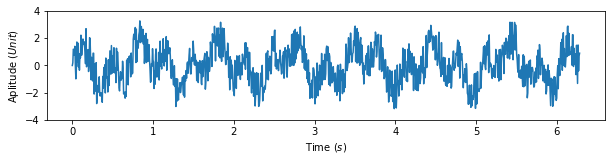

In [2]:
sig_1 = 1 * np.sin(2*np.pi * 6 * time) 
sig_2 = 2 * np.sin(2*np.pi * 13 * time) 

signal = sig_1 * sig_2

noise_level = 3
noise = noise_level * np.random.ranf(len(time)) - 1.5

noisy_signal = signal + noise
plot_signal(noisy_signal,4, sample_frequency)

In [3]:
cutoff_low = 20 # Hz
f_cl = cutoff_low / sample_frequency
cutoff_high = 8 # Hz
f_ch = cutoff_high / sample_frequency

transition_band = 3 # Hz
t_band = transition_band / sample_frequency  # Transition band

N = int(np.ceil((4 / t_band))) # Filter length
if not N % 2: N += 1  # Make sure that N is odd.
print("Filter Length =",N)

# Low-Pass with cutoff f_cl
n = np.arange(N)
h_lp = np.sinc(2 * f_cl * (n - (N - 1) / 2))
w = np.blackman(N) # Blackman window
h_lp = h_lp * w # Multiply filter by window.
h_lp = h_lp / np.sum(h_lp) # Normalize to get unity gain.


# High-Pass with cutoff f_cl
n = np.arange(N)
h_hp = np.sinc(2 * f_ch * (n - (N - 1) / 2))
w = np.blackman(N) # Blackman window
h_hp = h_hp * w # Multiply filter by window.
h_hp = h_hp / np.sum(h_hp) # Normalize to get unity gain.
h_hp = -h_hp # Perform spectral inversion to turn low_pass into high pass
h_hp[(N-1) // 2] += 1

Filter Length = 1335


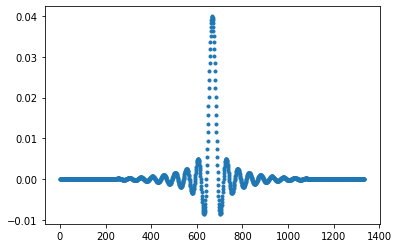

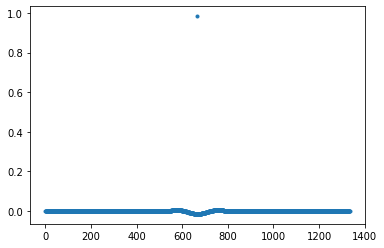

In [4]:
plt.plot(h_lp, '.')
plt.figure()
plt.plot(h_hp, '.')

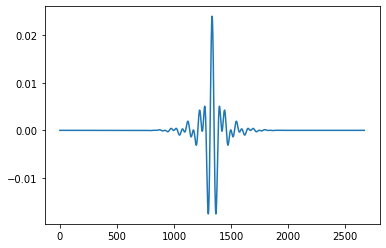

In [5]:
h = np.convolve(h_lp, h_hp)
plt.plot(h)

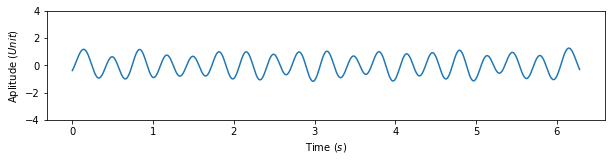

In [6]:
filtered_signal = np.convolve(noisy_signal, h)
filtered_signal = filtered_signal[N-2:-N]

plot_signal(filtered_signal, 4)

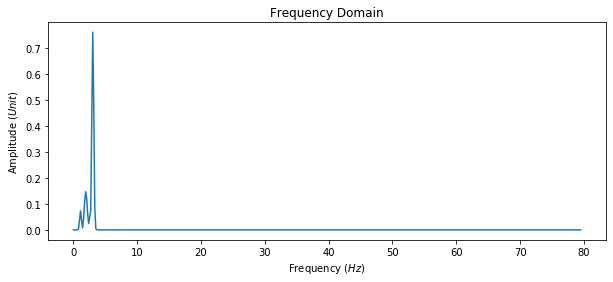

In [7]:
plot_fourier(filtered_signal)